# Задача классификации

# Введение в задачу классификации

Вы уже познакомились с машинным обучением на примере задачи регрессии. В этом разделе мы поговорим о еще одной популярной задачи в машинном обучении - **задачи классификации**.

Как вы помните, задача регрессии заключалась в том, чтобы предсказывать некоторе значение $y \in \mathbb{R}$ (принадлежащее множеству действительных чисел). Иными словами наши предсказания были неприрывными и могли принимать любые действительные значения.

Но что если варианты наших предсказаний ограничены. Например мы работаем в банке и решаем задачу кредитного скоринга: хотим по данным клиента предсказать вернет ли он кредит или нет. Иными словами мы **классифицируем** клиентов на тех кто вернет кредит и тех кто не вернет. Или например у нас есть изображение собачки, мы хотим классифицировать к какой породе относится данная собака. Хоть пород у собак достаточно много, но их количество всеравно ограничено.  

Данный тип задач, где требуется предсказать некоторый класс из известного списка и называется **задачей классификации**.

В первом примере в задаче кредитного скоринга у нас имеется клиент и 2 класса к которым мы можем его отнести (вернет/не вернет кредит). Задача в которй имеется всего 2 класса называется задачей **бинарной классификации**. Задача в которй имеется более двух классов, такой как классификация пород собак, когда у нас более двух пород, называется задачей **многоклассовой классификации**.

### Постановка задачи

$X$ - множество описаний объектов (признаки)

$y$ - истинная метка класса для каждого объекта (обычно метка обозначается целыми числами:..-2,-1,0,1,2,3...)

Как и в задаче регрессии, наша задача найти зависимость между $Х$ и $y$. Тоесть по имеющимся данным (обучающая выборка)<br> найти функцию $f(X) = y$, которая для любого объекта  $x \in X$ способна дать оценку к какому классу он относится.

Далее для простоты будем рассматривать задачу *бинарной классификации*. Позже будет рассказано, как с помощью бинарной классификаци перейти к многоклассовой.

### Пример

**Классификация цветков Ириса**

Требуется классифицировать цветки Ириса по двум видам:

* iris setosa

* iris virginica

В качестве признаков рассмотрим два признака: длину и ширина чашелистика

In [1]:
from classification_helper import * # Подгружаем функции для визуализации
import numpy as np              # Подгруджаем библиотеку NumPy

In [2]:
X, kind_iris = get_data()

$X$ - двумерный массив признаков

$kind\_iris$ - вектор истинных видов цветков (*target*)

In [3]:
X.shape

(100, 2)

In [4]:
kind_iris.shape

(100,)

In [5]:
print_data(X,kind_iris)

   Длина чашелистика Ширина чашелистика       Вид Ириса
0                5.1                3.5     iris setosa
1                4.9                3.0     iris setosa
2                4.7                3.2     iris setosa
3                4.6                3.1     iris setosa
4                5.0                3.6     iris setosa
5                5.4                3.9     iris setosa
6                4.6                3.4     iris setosa
7                5.0                3.4     iris setosa
8                4.4                2.9     iris setosa
9                4.9                3.1     iris setosa
10               5.4                3.7     iris setosa
11               4.8                3.4     iris setosa
12               4.8                3.0     iris setosa
13               4.3                3.0     iris setosa
14               5.8                4.0     iris setosa
15               5.7                4.4     iris setosa
16               5.4                3.9     iris

Первые 50 строчек таблицы соответсвуют виду iris setosa, остальные 50 iris virginica

Визуализируем данные

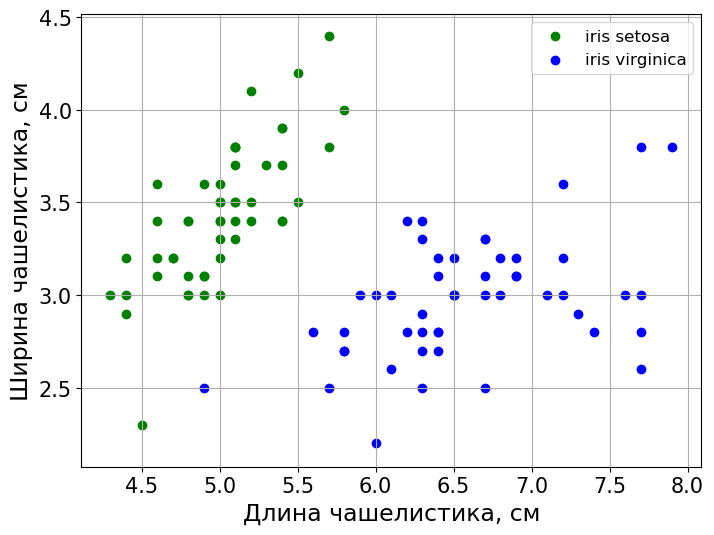

In [6]:
plot_data(X,kind_iris)

Как видим точки на графике разбросаны не совсем хаотично, а имеют некоторую структуру, значит существует зависимость между параметраими чашелистика и видом цветка Ириса

Попробуем найти такую зависимость